In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/car_prices.csv')

# **Understanding Data**

In [5]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [50]:
df.shape

(32960, 17)

In [7]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,33441.000000,23430.000000,33377.000000,33440.000000,33440.000000
mean,2008.056099,28.658643,88670.249363,11151.972937,10764.741298
std,4.520510,13.845368,60700.390803,9794.422942,9771.770346
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2005.000000,19.000000,36836.000000,3800.000000,3400.000000
50%,2008.000000,31.000000,84458.000000,8950.000000,8500.000000
75%,2012.000000,39.000000,127713.000000,15900.000000,15500.000000
max,2015.000000,49.000000,999999.000000,157000.000000,154000.000000


In [8]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

# **Missing Values & Handling it**

In [9]:
df.isnull().sum()

,0
year,0
make,183
model,185
trim,319
body,1212
transmission,4017
vin,0
state,0
condition,10011
odometer,64


In [10]:
df['model'].value_counts()

,count
model,
F-150,813
3 Series,676
Escape,650
Accord,638
Camry,626
...,...
silhouette,1
Le Baron,1
regal,1


In [11]:
df['make'].value_counts()

,count
make,
Ford,5247
Chevrolet,3390
Nissan,2266
Toyota,2216
Honda,1848
...,...
mercedes-b,1
chev truck,1
Daewoo,1


In [12]:
df['condition'].value_counts()

,count
condition,
19.0,2325
2.0,1379
35.0,1052
37.0,964
36.0,909
28.0,900
44.0,879
43.0,869
29.0,863


In [13]:
df['transmission'].value_counts()

,count
transmission,
automatic,28088
manual,1336


In [14]:
df['body'].value_counts()

,count
body,
Sedan,13245
SUV,8832
Minivan,1572
Hatchback,1477
Coupe,1205
Wagon,1121
Crew Cab,956
Convertible,813
SuperCrew,480


In [15]:
df['color'].value_counts()

,count
color,
black,6490
white,5942
silver,5153
gray,4889
blue,3430
red,2577
green,1001
gold,897
—,826


In [16]:
condition_mode = df['condition'].mode()[0]
df['condition'].fillna(condition_mode, inplace=True)

<ipython-input-16-2486e3f21fd0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna(condition_mode, inplace=True)


In [17]:
df['color'].fillna('black', inplace=True)

<ipython-input-17-fa9428f0e481>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna('black', inplace=True)


In [18]:
df['body'].fillna('sedan', inplace=True)

<ipython-input-18-e4377a599061>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].fillna('sedan', inplace=True)


In [19]:
df['transmission'].fillna('automatic', inplace=True)

<ipython-input-19-99a93a2d7603>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission'].fillna('automatic', inplace=True)


In [20]:
df['make'].fillna('toyota', inplace=True)

<ipython-input-20-4725391390ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['make'].fillna('toyota', inplace=True)


In [21]:
df.dropna(inplace=True)

In [22]:
df['model'].fillna('camry', inplace=True)

<ipython-input-22-60f371e1f1de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].fillna('camry', inplace=True)


In [23]:
df['trim'].fillna('base', inplace=True)

<ipython-input-23-6f0a09928823>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trim'].fillna('base', inplace=True)


In [24]:
df['interior'].fillna('standard', inplace=True)

<ipython-input-24-8f02f3db4829>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interior'].fillna('standard', inplace=True)


In [25]:
df['odometer'].value_counts()

,count
odometer,
1.0,246
999999.0,6
40401.0,5
17841.0,5
29476.0,4
...,...
11398.0,1
15686.0,1
5554.0,1


In [26]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['odometer']] = imputer.fit_transform(df[['odometer']])


In [27]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


# **Duplicated Values**

In [28]:
df.duplicated().sum()

np.int64(0)

# **EDA &  Preprocessing**

In [29]:
df.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,float64


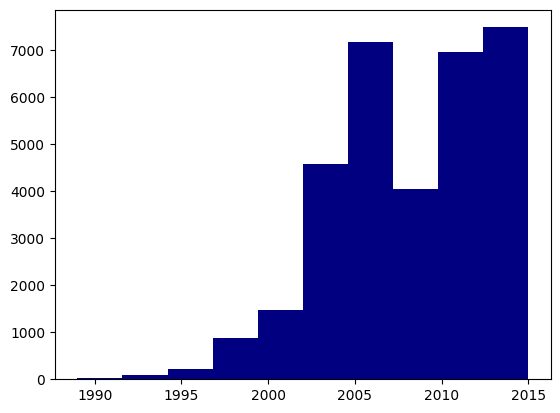

In [30]:
plt.hist(df['year'], color='navy')
plt.show()

## **Condition and Sellingprice**

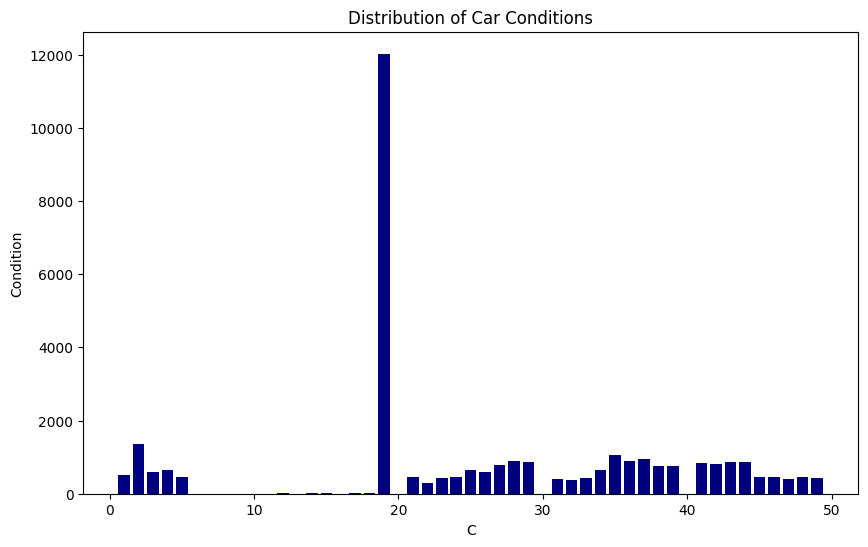

In [31]:
condition_counts = df['condition'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index, condition_counts.values, color='navy')
plt.xlabel('C')
plt.ylabel('Condition')
plt.title('Distribution of Car Conditions')
plt.show()

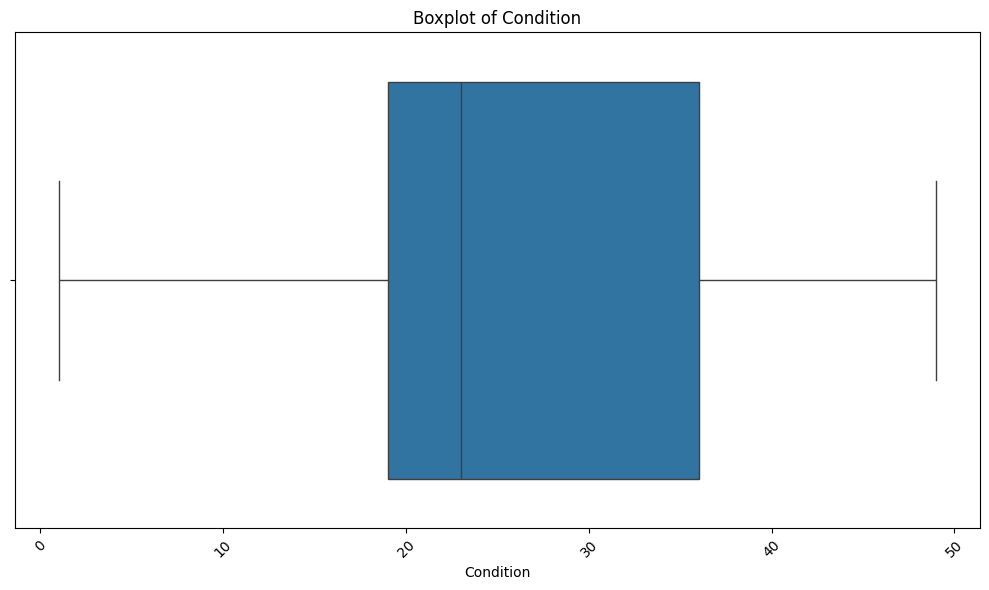

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', data=df)
plt.xlabel('Condition')
plt.title('Boxplot of Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df['condition'].value_counts()

,count
condition,
19.0,12026
2.0,1354
35.0,1045
37.0,956
36.0,900
28.0,895
44.0,875
43.0,864
29.0,854


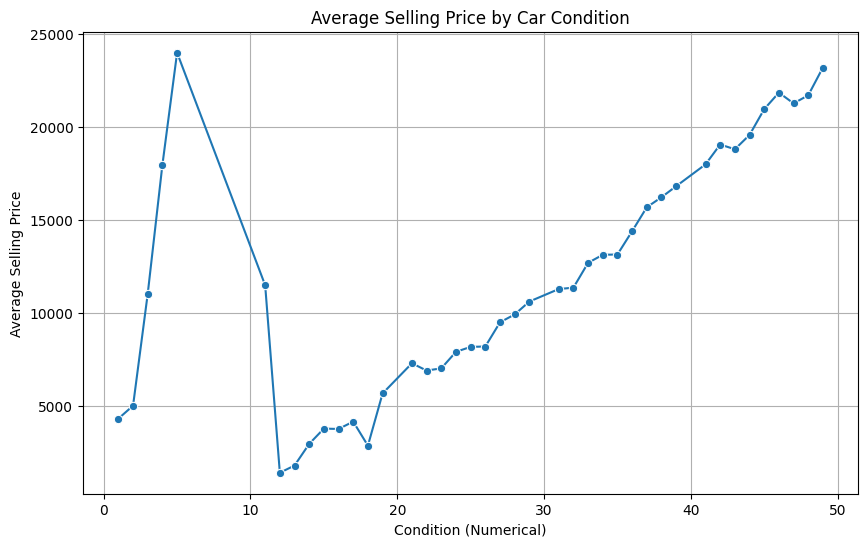

In [34]:

avg_price_by_condition = df.groupby('condition')['sellingprice'].mean().reset_index()

avg_price_by_condition = avg_price_by_condition.sort_values('condition')

plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='sellingprice', data=avg_price_by_condition, marker='o')
plt.xlabel('Condition (Numerical)')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Car Condition')
plt.grid(True)
plt.show()


In [51]:
df[df['condition'].isin([5,6, 7, 8, 9])].describe()


,year,condition,odometer,mmr,sellingprice
count,459,459.0,459.000000,459.000000,459.000000
mean,2012-12-19 19:45:52.941176576,5.0,20778.930283,23497.549020,24003.047930
min,2001-01-01 00:00:00,5.0,20.000000,2000.000000,1400.000000
25%,2013-01-01 00:00:00,5.0,5809.000000,15625.000000,16000.000000
50%,2014-01-01 00:00:00,5.0,11862.000000,20500.000000,20700.000000
75%,2014-01-01 00:00:00,5.0,23419.500000,27650.000000,28250.000000
max,2015-01-01 00:00:00,5.0,131304.000000,133000.000000,139000.000000
std,NaN,0.0,24461.267003,13930.718634,14206.014659


In [36]:
df['condition'].value_counts().sort_index()


,count
condition,
1.0,504
2.0,1354
3.0,592
4.0,644
5.0,459
11.0,4
12.0,7
13.0,1
14.0,14


In [37]:
df[df['condition'] == 6].shape


(0, 16)

In [38]:
df[df['condition'] == 6][['sellingprice', 'make', 'model', 'year', 'odometer']]


,sellingprice,make,model,year,odometer


In [39]:
df[df['condition'] < 10]['sellingprice'].describe()


,sellingprice
count,3553.000000
mean,10724.786659
std,11290.892008
min,100.000000
25%,2100.000000
50%,8500.000000
75%,16100.000000
max,149800.000000


In [40]:
df['condition_level'] = pd.cut(df['condition'], bins=[0, 20, 35, 50], labels=['Poor', 'Fair', 'Good'])


In [41]:
df['condition_level'].value_counts()

,count
condition_level,
Poor,15656
Good,9003
Fair,8301


In [42]:
df[df['condition'] < 10].value_counts()

year  make           model      trim    body         transmission  vin                state  condition  odometer  color     interior  seller                                              mmr      sellingprice  saledate                                 condition_level
2015  chevrolet      capt       spt lt  sedan        automatic     3gnal3ek9fs509942  nj     1.0        9677.0    gray      black     enterprise vehicle exchange / tra / rental / tulsa  18150.0  11000.0       Wed Jan 14 2015 04:00:00 GMT-0800 (PST)  Poor               1
      Kia            Sorento    LX      SUV          automatic     5xyktca66fg561407  ca     5.0        14634.0   silver    black     kia motors america  inc                             20600.0  21500.0       Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  Poor               1
                                                                   5xyktca65fg571619  ca     5.0        11001.0   white     black     kia motors america  inc                             20700.0  22500.0       Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  Poor               1
                                                                   5xyktca60fg570829  ca     5.0        10615.0   burgundy  black     kia motors america  inc                             20700.0  20500.0       Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  Poor               1
                                                                   5xyktca60fg565226  ca     5.0        13757.0   red       black     kia motors america  inc                             20600.0  20750.0       Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  Poor               1
                                                                                                                                                                                                                                                                            ..
1991  Nissan         Maxima     GXE     Sedan        automatic     jn1hj01p5mt524361  fl     2.0        177167.0  black     gray      coral springs honda                                 575.0    400.0         Thu Dec 18 2014 11:00:00 GMT-0800 (PST)  Poor               1
      Mercedes-Benz  500-Class  500SL   Convertible  automatic     wdbfa66e5mf030237  fl     2.0        117006.0  blue      beige     silva auto sales                                    2100.0   1600.0        Fri Feb 06 2015 01:20:00 GMT-0800 (PST)  Poor               1
      Lexus          LS 400     Base    Sedan        automatic     jt8uf11e5m0094008  ca     2.0        171533.0  silver    silver    san diego sports cars                               1075.0   1400.0        Wed Dec 17 2014 12:15:00 GMT-0800 (PST)  Poor               1
1990  Toyota         Camry      Deluxe  Sedan        automatic     jt2sv21exl0345999  wa     2.0        214723.0  blue      blue      donate for charity                                  675.0    375.0         Wed Jan 28 2015 04:30:00 GMT-0800 (PST)  Poor               1
                     4Runner    SR5 V6  SUV          automatic     jt3vn39w7l0041265  va     1.0        164016.0  blue      blue      flexco fleet services                               600.0    500.0         Thu Dec 18 2014 09:20:00 GMT-0800 (PST)  Poor               1
Name: count, Length: 3553, dtype: int64

<ipython-input-43-f13fe4fd0967>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = df.groupby(['condition_level', 'condition'])['sellingprice'].mean().reset_index()


<Axes: xlabel='condition', ylabel='sellingprice'>

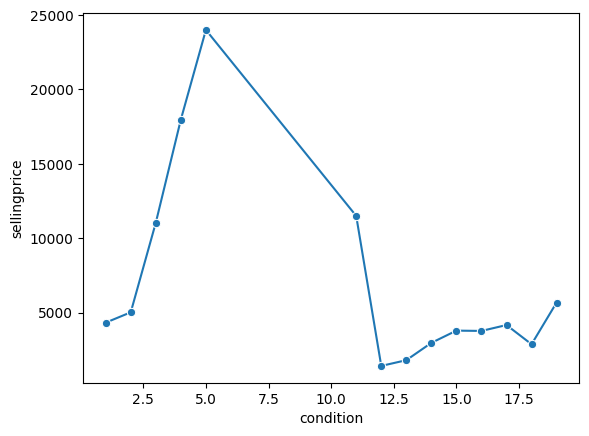

In [43]:
avg_price_by_condition = df.groupby(['condition_level', 'condition'])['sellingprice'].mean().reset_index()
poor_condition_data = avg_price_by_condition[avg_price_by_condition['condition_level'] == 'Poor']
sns.lineplot(x='condition', y='sellingprice', data=poor_condition_data, marker='o')

<ipython-input-44-18f2cb3e0426>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = df.groupby(['condition_level', 'condition'])['sellingprice'].mean().reset_index()


<Axes: xlabel='condition', ylabel='sellingprice'>

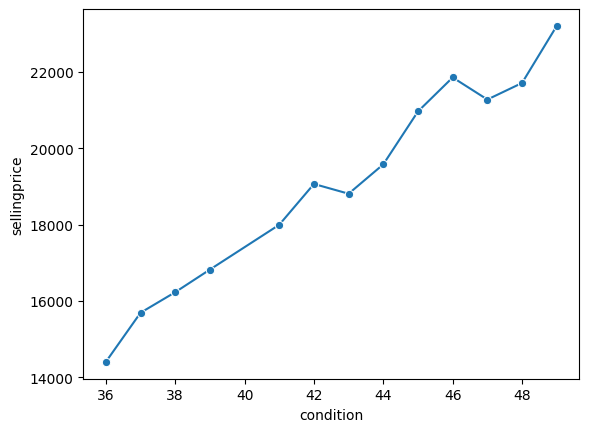

In [44]:
avg_price_by_condition = df.groupby(['condition_level', 'condition'])['sellingprice'].mean().reset_index()
poor_condition_data = avg_price_by_condition[avg_price_by_condition['condition_level'] == 'Good']
sns.lineplot(x='condition', y='sellingprice', data=poor_condition_data, marker='o')

<ipython-input-52-ae980f899a7f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = df.groupby(['condition_level', 'condition'])['sellingprice'].mean().reset_index()


<Axes: xlabel='condition', ylabel='sellingprice'>

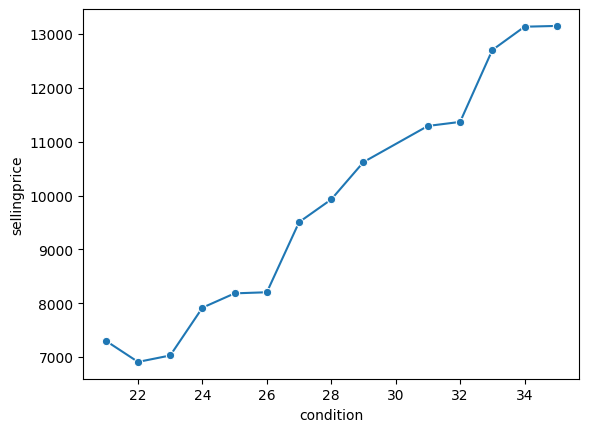

In [52]:
avg_price_by_condition = df.groupby(['condition_level', 'condition'])['sellingprice'].mean().reset_index()
poor_condition_data = avg_price_by_condition[avg_price_by_condition['condition_level'] == 'Fair']
sns.lineplot(x='condition', y='sellingprice', data=poor_condition_data, marker='o')

## **SellingPrice and SellingYear**

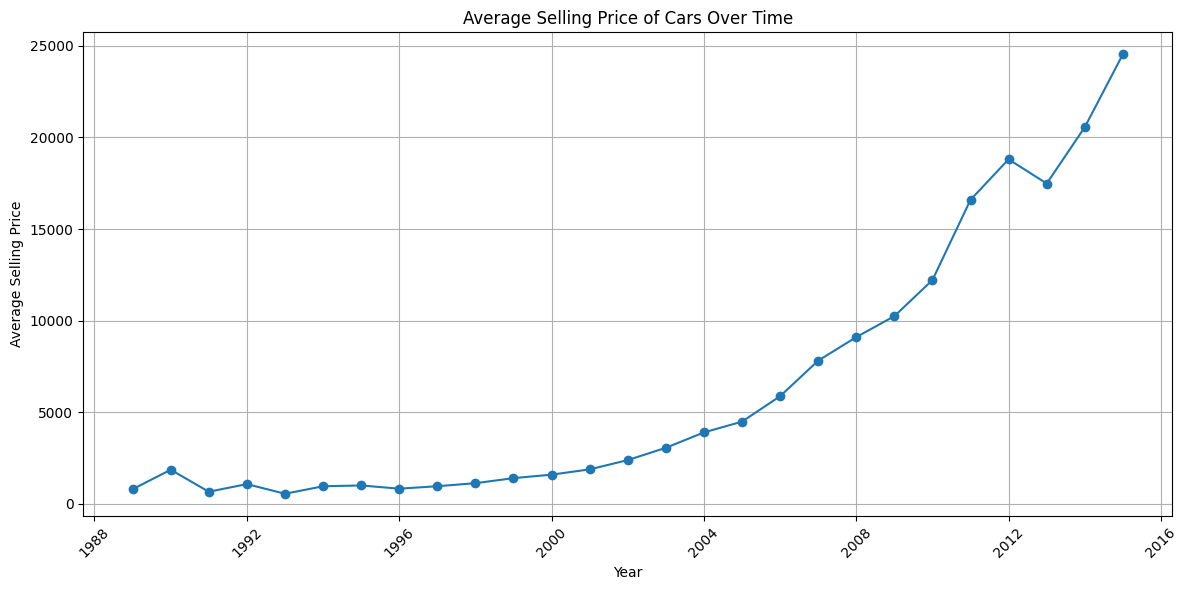

In [46]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
avg_price_by_year = df.groupby('year')['sellingprice'].mean().reset_index()
avg_price_by_year = avg_price_by_year.sort_values('year')
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year['year'], avg_price_by_year['sellingprice'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price of Cars Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
df['saledate']

,saledate
0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...
33435,Wed Dec 17 2014 10:00:00 GMT-0800 (PST)
33436,Tue Dec 23 2014 12:00:00 GMT-0800 (PST)
33437,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
33438,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [53]:
# Convert 'saledate' to datetime objects, coercing errors to NaT
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# Check the data type to confirm conversion
print(df['saledate'].dtype)

# Proceed with extracting date components. Rows where saledate is NaT will result in NaT for these new columns.
df['sale_day'] = df['saledate'].dt.day
df['sale_month'] = df['saledate'].dt.month
df['sale_year'] = df['saledate'].dt.year
df['sale_hour'] = df['saledate'].dt.hour

print(df[['saledate', 'sale_day', 'sale_month', 'sale_year', 'sale_hour']].head())

datetime64[ns, tzoffset('PST', 28800)]
                   saledate  sale_day  sale_month  sale_year  sale_hour
0 2014-12-16 12:30:00+08:00      16.0        12.0     2014.0       12.0
1 2014-12-16 12:30:00+08:00      16.0        12.0     2014.0       12.0
2 2015-01-15 04:30:00+08:00      15.0         1.0     2015.0        4.0
3 2015-01-29 04:30:00+08:00      29.0         1.0     2015.0        4.0
4 2014-12-18 12:30:00+08:00      18.0        12.0     2014.0       12.0


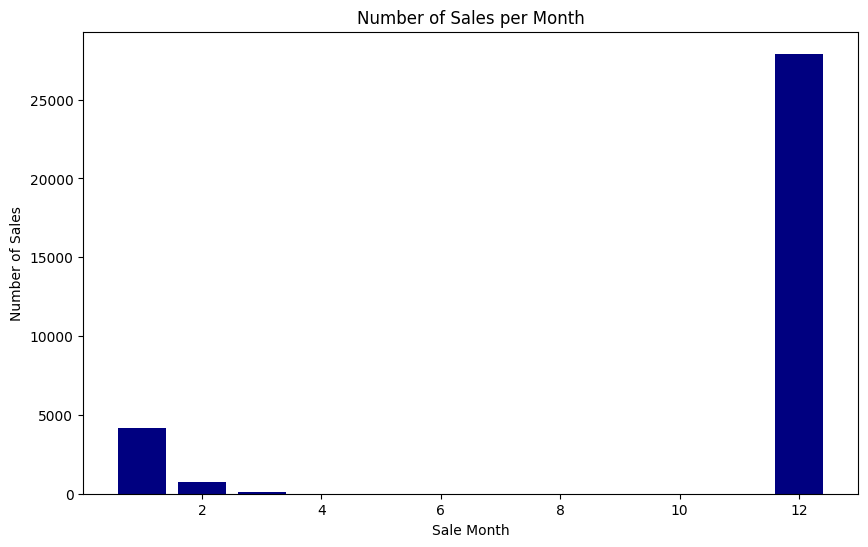

In [54]:
monthly_sales= df['sale_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(x=monthly_sales.index, height=monthly_sales.values, color='navy')
plt.xlabel('Sale Month')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Month')
plt.show()

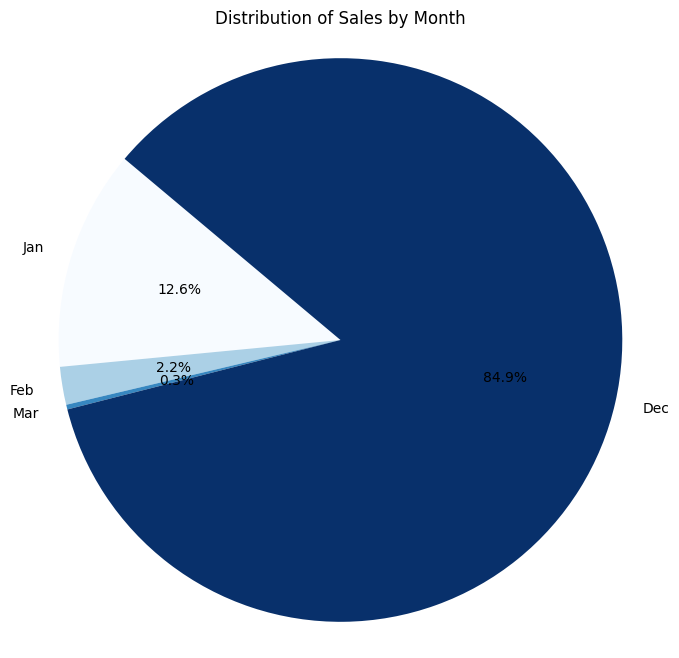

In [109]:
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

monthly_sales_pie = df['sale_month'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(monthly_sales_pie, labels=[month_names[m] for m in monthly_sales_pie.index], autopct='%1.1f%%', startangle=140, colors=plt.cm.Blues(np.linspace(0, 1, len(monthly_sales_pie))))
plt.title('Distribution of Sales by Month')
plt.axis('equal')
plt.show()


In [56]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'condition_level', 'sale_day', 'sale_month',
       'sale_year', 'sale_hour'],
      dtype='object')

# **Outliers**

In [57]:
def filter_iqr(group):
    Q1 = group['sellingprice'].quantile(0.25)
    Q3 = group['sellingprice'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['sellingprice'] >= lower_bound) & (group['sellingprice'] <= upper_bound)]

df_clean = df.groupby('condition').apply(filter_iqr).reset_index(drop=True)


<ipython-input-57-900447e006ef>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df.groupby('condition').apply(filter_iqr).reset_index(drop=True)


In [58]:
df_clean.shape

(31461, 21)

# **Break features down into two perspectives:**
Use market-driven features for price prediction models.

Use customer-priority features for recommendation systems or preference clustering.

Use dual features for both

# **Customer Preferences: trim, transmission, color, interior**

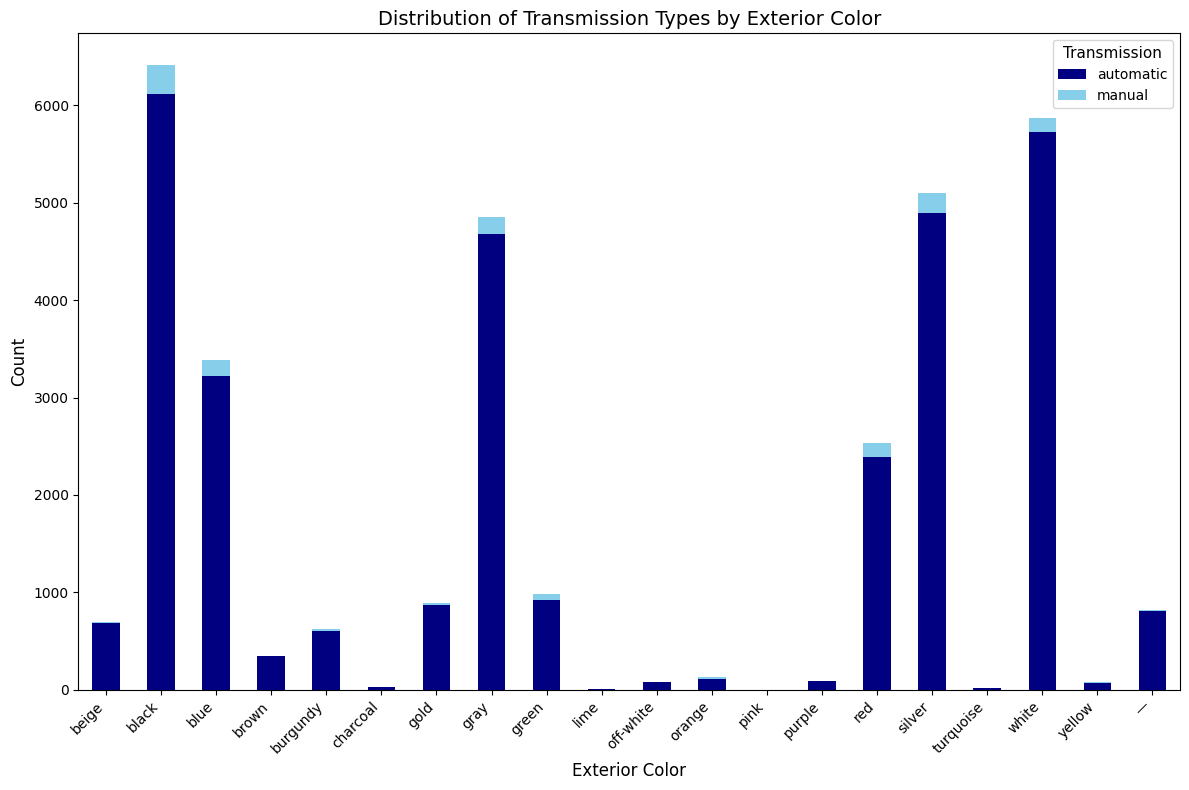

In [59]:
from matplotlib.colors import LinearSegmentedColormap
custom_colors = ['navy', 'skyblue']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
color_transmission_counts = df.groupby(['color', 'transmission']).size().unstack(fill_value=0)


ax = color_transmission_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    cmap=custom_cmap
)


ax.set_title('Distribution of Transmission Types by Exterior Color', fontsize=14)
ax.set_xlabel('Exterior Color', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Transmission', title_fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [60]:
df['transmission'].value_counts()

,count
transmission,
automatic,31653
manual,1307


In [61]:
df['trim'].value_counts()

,count
trim,
Base,3816
SE,2210
LX,1141
Limited,1102
XLT,968
...,...
Trail,1
2.5i Touring PZEV,1
Laramie Longhorn,1


In [62]:
transmission_trim_counts = df.groupby(['trim', 'transmission']).size().unstack(fill_value=0)
transmission_trim_counts = transmission_trim_counts.sort_values(by='automatic', ascending=False)
transmission_trim_counts

transmission,automatic,manual
trim,,
Base,3590,226
SE,2161,49
Limited,1097,5
LX,1094,47
XLT,953,15
...,...,...
DX V6,0,1
IX,0,1
John Cooper Works,0,1


In [63]:
color_interior_counts = df.groupby(['color', 'interior']).size().unstack(fill_value=0)

color_interior_counts

interior,beige,black,blue,brown,burgundy,gold,gray,green,off-white,orange,purple,red,silver,tan,white,yellow,—
color,,,,,,,,,,,,,,,,,
beige,142,75,0,18,0,1,107,0,0,0,0,0,0,221,0,0,135
black,480,2912,7,105,2,0,1535,3,4,2,7,16,2,457,2,0,886
blue,305,853,34,38,0,0,1303,0,3,0,3,1,11,276,0,0,559
brown,69,85,0,40,0,1,42,0,0,0,1,0,1,58,0,0,54
burgundy,93,131,0,14,0,0,171,0,0,0,2,0,1,111,1,0,95
charcoal,0,14,0,0,1,0,7,0,0,0,0,0,0,1,0,0,2
gold,226,90,0,26,0,4,113,0,0,0,0,0,1,261,0,0,166
gray,262,1982,6,41,1,0,1682,2,1,1,2,8,12,172,4,0,676
green,161,143,1,25,0,0,285,5,0,0,0,0,0,173,2,0,186


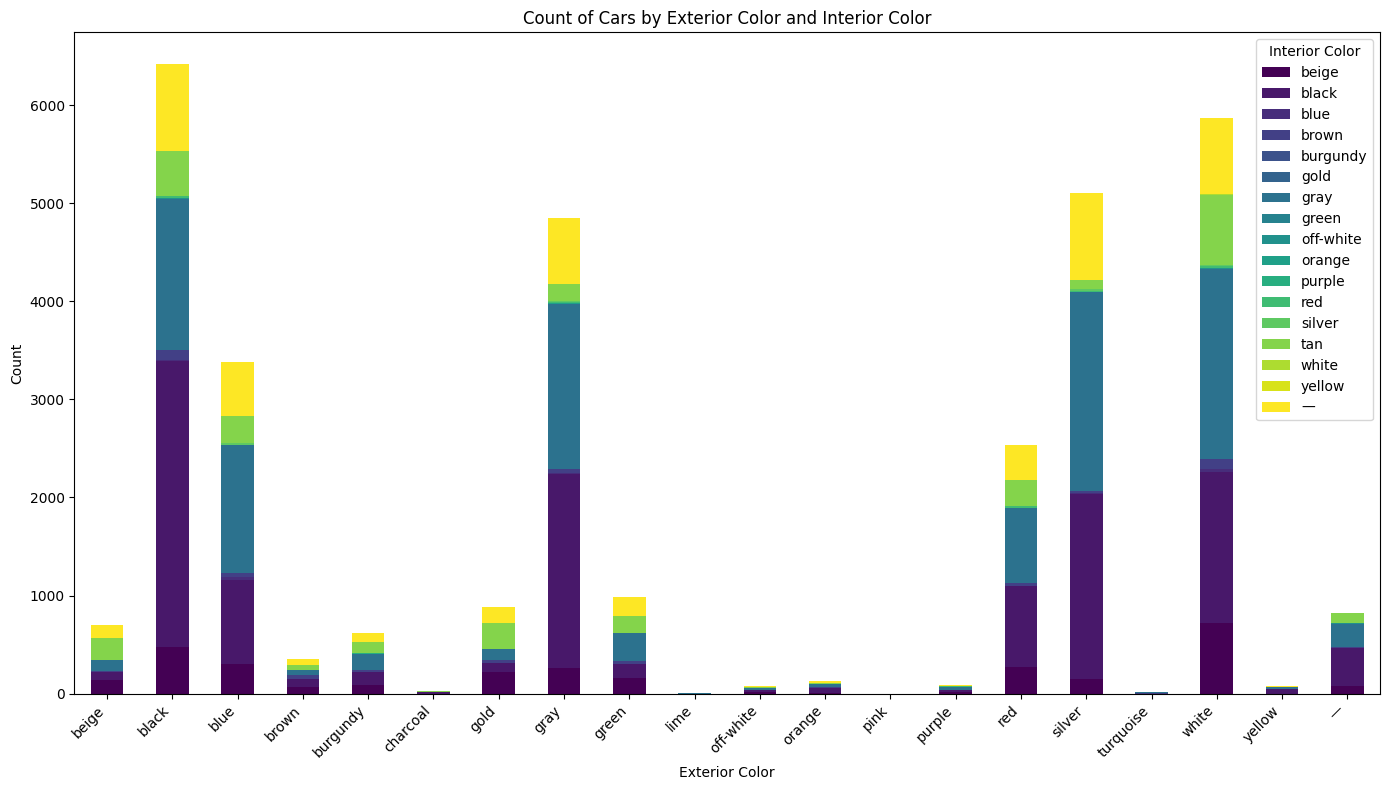

In [104]:
import matplotlib.pyplot as plt
color_interior_counts.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='viridis')
plt.title('Count of Cars by Exterior Color and Interior Color')
plt.xlabel('Exterior Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Interior Color')
plt.tight_layout()
plt.show()


# **Pure Market Signals: vin, state, odometer, seller, mmr**

## **State**

In [65]:
state_counts_by_year = df.groupby(['year', 'state']).size().reset_index(name='count')
top_states_by_year = state_counts_by_year.groupby('year').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)
if 2015 in top_states_by_year['year'].unique():
    plt.figure(figsize=(12, 7))
    sns.barplot(data=top_states_by_year[top_states_by_year['year'] == 2015], x='state', y='count', color='navy')
    plt.title('Top 10 States by Number of Cars of Model Year 2015 Sold')
    plt.xlabel('State')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<ipython-input-65-6990b9e87650>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_states_by_year = state_counts_by_year.groupby('year').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


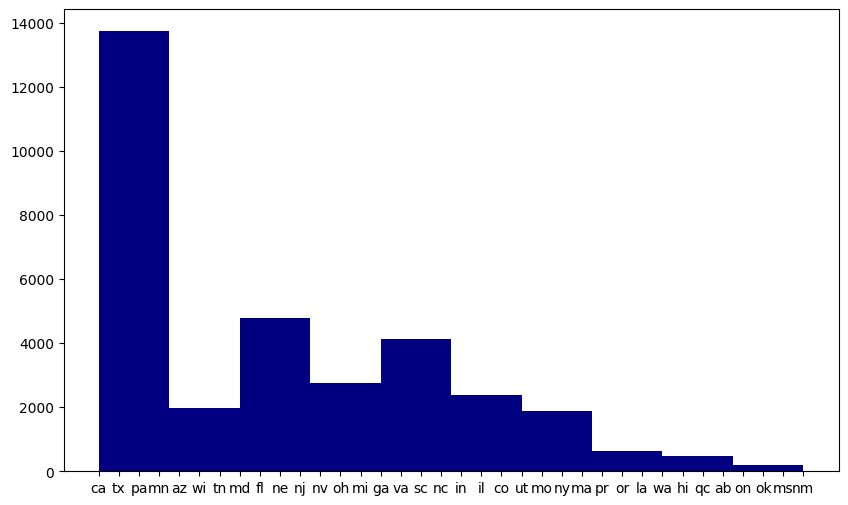

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(df['state'], color='navy')
plt.show()

In [67]:
df['state'].unique().T

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm'], dtype=object)

In [68]:
state_mapping = {
    'ca': 'California', 'tx': 'Texas', 'pa': 'Pennsylvania', 'mn': 'Minnesota',
    'az': 'Arizona', 'wi': 'Wisconsin', 'tn': 'Tennessee', 'md': 'Maryland',
    'fl': 'Florida', 'ne': 'Nebraska', 'nj': 'New Jersey', 'nv': 'Nevada',
    'oh': 'Ohio', 'mi': 'Michigan', 'ga': 'Georgia', 'va': 'Virginia',
    'sc': 'South Carolina', 'nc': 'North Carolina', 'in': 'Indiana',
    'il': 'Illinois', 'co': 'Colorado', 'ut': 'Utah', 'mo': 'Missouri',
    'ny': 'New York', 'ma': 'Massachusetts', 'pr': 'Puerto Rico',
    'or': 'Oregon', 'la': 'Louisiana', 'wa': 'Washington', 'hi': 'Hawaii',
    'qc': 'Quebec', 'ab': 'Alberta', 'on': 'Ontario', 'ok': 'Oklahoma',
    'ms': 'Mississippi', 'nm': 'New Mexico'
}


In [69]:
df['state_full'] = df['state'].map(state_mapping)


## **Seller**

In [70]:
# Top 10 sellers by number of listings
top_sellers = df['seller'].value_counts().head(10)
print(top_sellers)


seller
ford motor credit company llc             718
santander consumer                        633
nissan infiniti lt                        585
wells fargo dealer services               523
jpmorgan chase bank n.a.                  504
avis corporation                          463
financial services remarketing (lease)    454
nissan-infiniti lt                        375
enterprise veh exchange/rental            362
ge fleet services for itself/servicer     313
Name: count, dtype: int64


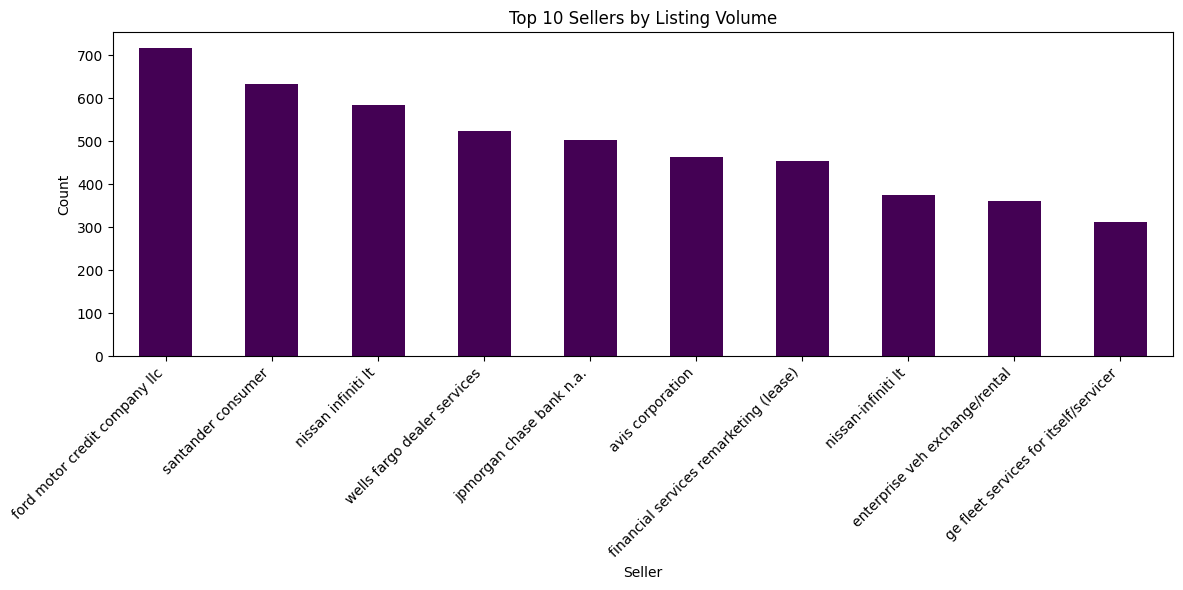

In [98]:

plt.figure(figsize=(12,6))
top_sellers.plot(kind='bar', cmap='viridis')
plt.title('Top 10 Sellers by Listing Volume')
plt.xlabel('Seller')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Odometer**

In [72]:
df[['odometer', 'sellingprice']].corr()

,odometer,sellingprice
odometer,1.000000,-0.608714
sellingprice,-0.608714,1.000000


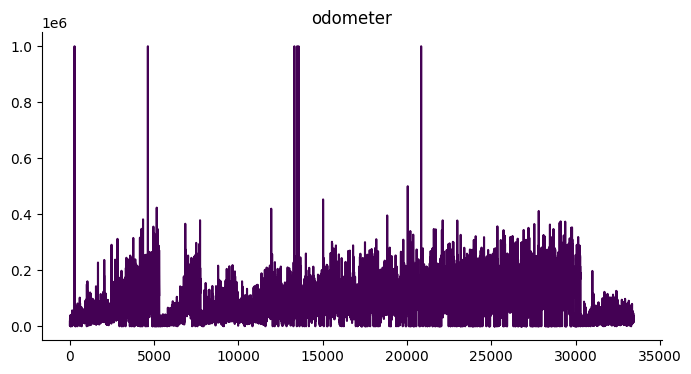

In [99]:
from matplotlib import pyplot as plt
df['odometer'].plot(kind='line', figsize=(8, 4), title='odometer',cmap='viridis')
plt.gca().spines[['top', 'right']].set_visible(False)

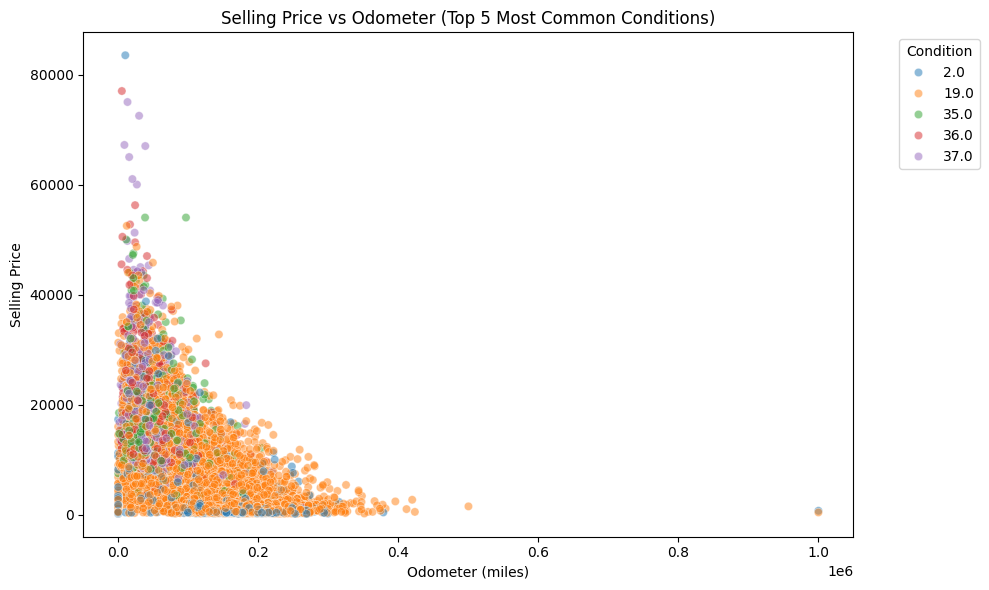

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 most frequent conditions
top_5_conditions = df['condition'].value_counts().nlargest(5).index

# Filter the DataFrame
df_top5 = df[df['condition'].isin(top_5_conditions)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top5, x='odometer', y='sellingprice', alpha=0.5, hue='condition', palette='tab10')
plt.title('Selling Price vs Odometer (Top 5 Most Common Conditions)')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **VINS**

In [75]:
df['vin'].duplicated().sum()

np.int64(4)

Total duplicated rows by VIN: 8


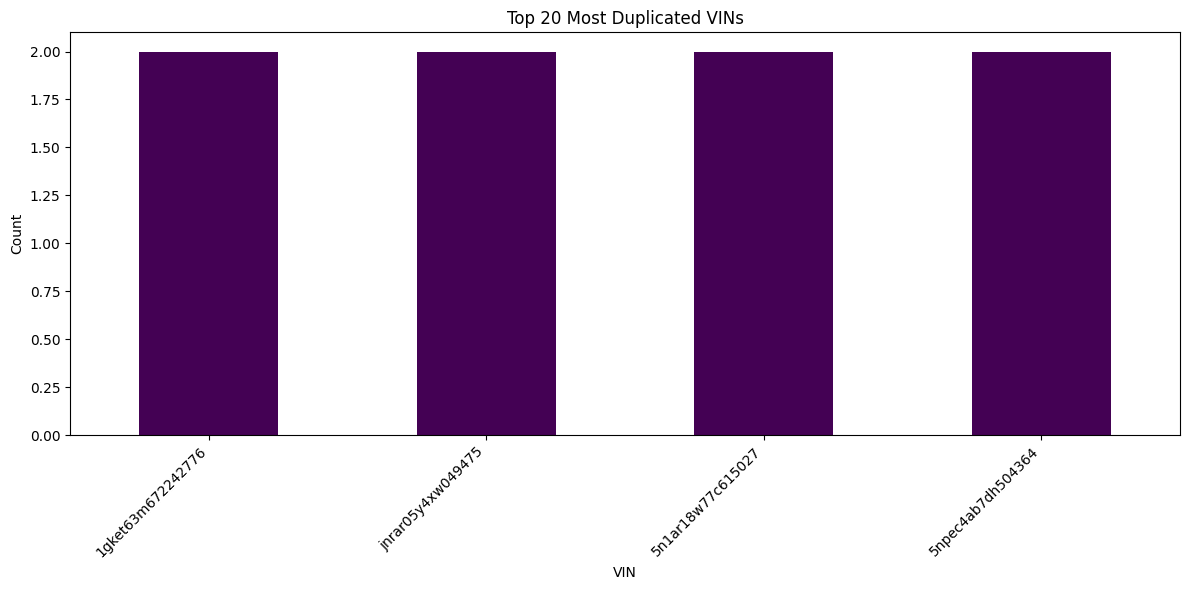

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Check for duplicated VINs
duplicated_vins = df[df['vin'].duplicated(keep=False)]
print(f"Total duplicated rows by VIN: {duplicated_vins.shape[0]}")

# 2. Count how many times each VIN appears
vin_counts = df['vin'].value_counts()
vin_duplicates = vin_counts[vin_counts > 1]

# 3. Plot top 20 most duplicated VINs
plt.figure(figsize=(12,6))
vin_duplicates.head(20).plot(kind='bar', cmap='viridis')
plt.title('Top 20 Most Duplicated VINs')
plt.xlabel('VIN')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Remove duplicate listings (keeping the first)
df_deduplicated = df.drop_duplicates(subset='vin', keep='first')



In [77]:
df_deduplicated.shape

(32956, 22)

In [78]:
df.shape

(32960, 22)

In [79]:
df['price_diff'] = df['sellingprice'] - df['mmr']

In [101]:
df['price_diff']

,price_diff
0,1000.0
1,700.0
2,-1900.0
3,250.0
4,1000.0
...,...
33435,2400.0
33436,-3500.0
33437,3300.0
33438,550.0


## **MMR**

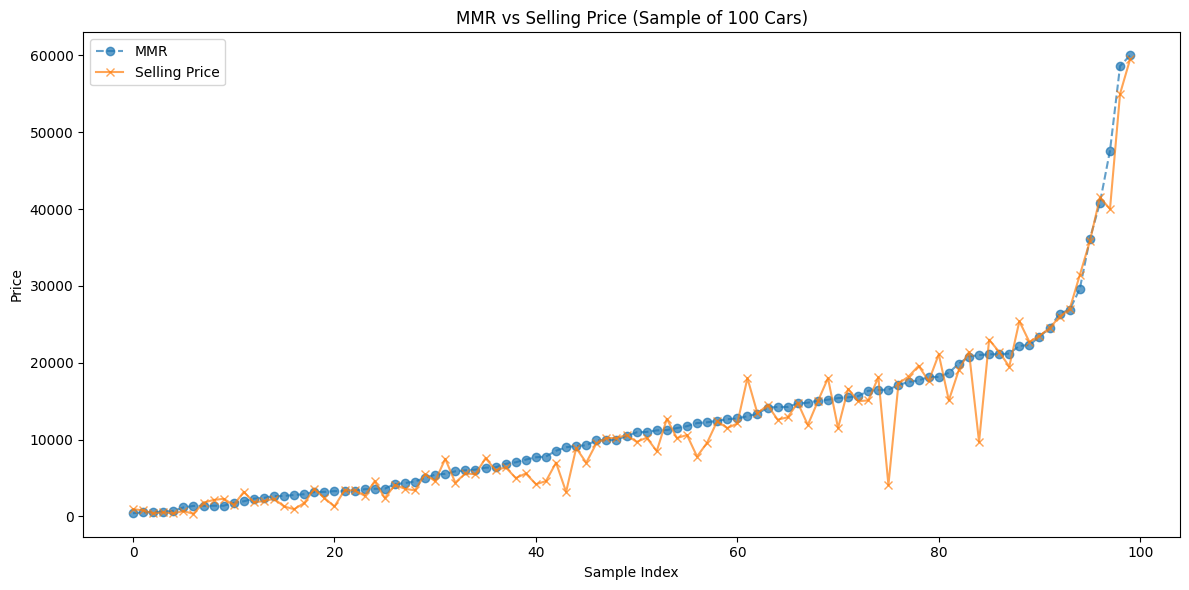

In [80]:
sample_df = df.sample(100, random_state=42).sort_values('mmr')

plt.figure(figsize=(12, 6))
plt.plot(sample_df['mmr'].values, label='MMR', marker='o', linestyle='--', alpha=0.7)
plt.plot(sample_df['sellingprice'].values, label='Selling Price', marker='x', linestyle='-', alpha=0.7)
plt.title('MMR vs Selling Price (Sample of 100 Cars)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


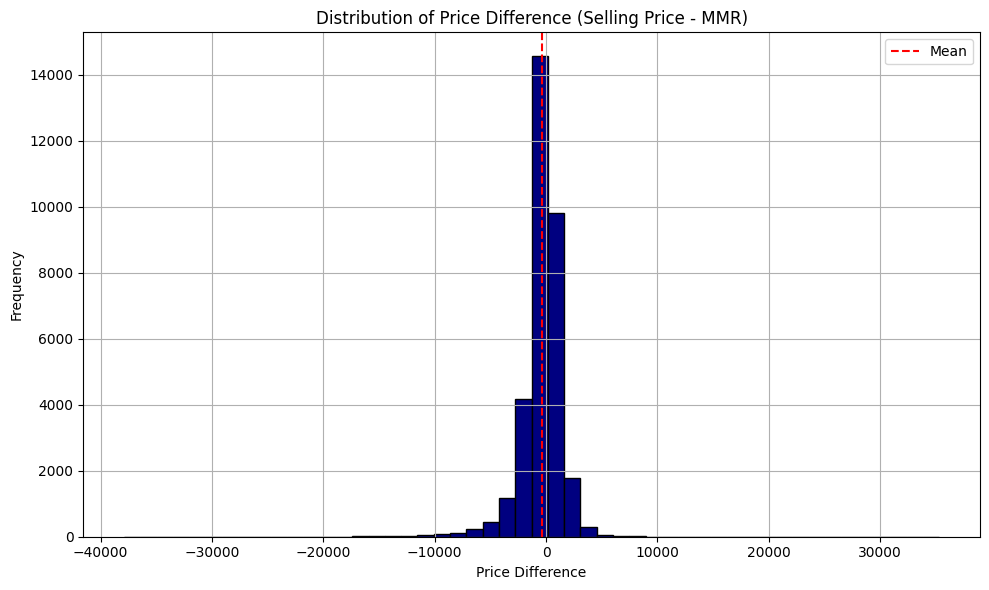

In [97]:
plt.figure(figsize=(10, 6))
df['price_diff'].hist(bins=50, color='navy', edgecolor='black')
plt.title('Distribution of Price Difference (Selling Price - MMR)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.axvline(df['price_diff'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()


In [82]:
upper_threshold = df['price_diff'].quantile(0.95)
lower_threshold = df['price_diff'].quantile(0.05)
# Flagging
df['price_range'] = df['price_diff'].apply(lambda x: 'Overpriced' if x > upper_threshold else ('Underpriced' if x < lower_threshold else 'Normal'))
# Count each category
df['price_range'].value_counts()


,count
price_range,
Normal,29766
Underpriced,1638
Overpriced,1556


# **Dual Influence: make, model, body, condition**

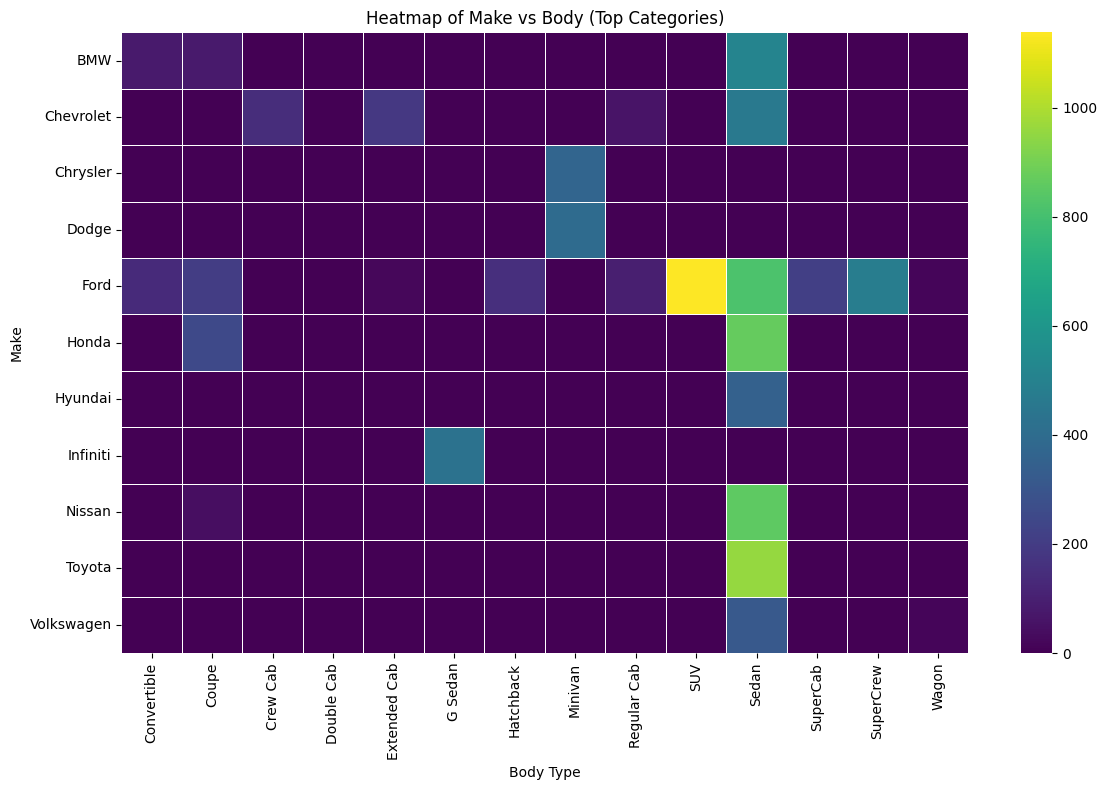

In [85]:
top_n = 20 # Adjust this number based on how many categories you want to visualize

top_makes = df['make'].value_counts().nlargest(top_n).index.tolist()
top_models = df['model'].value_counts().nlargest(top_n).index.tolist()
top_bodies = df['body'].value_counts().nlargest(top_n).index.tolist()

# Filter the dataframe to include only these top categories
df_top_categories = df[
    df['make'].isin(top_makes) &
    df['model'].isin(top_models) &
    df['body'].isin(top_bodies)
].copy()

# Heatmap: Make vs Body
if not df_top_categories.empty:
    make_body_counts = pd.crosstab(df_top_categories['make'], df_top_categories['body'])

    plt.figure(figsize=(12, 8))
    sns.heatmap(make_body_counts, cmap='viridis', annot=False, fmt='d', linewidths=.5)
    plt.title('Heatmap of Make vs Body (Top Categories)')
    plt.xlabel('Body Type')
    plt.ylabel('Make')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points after filtering for top categories to create Make vs Body heatmap.")


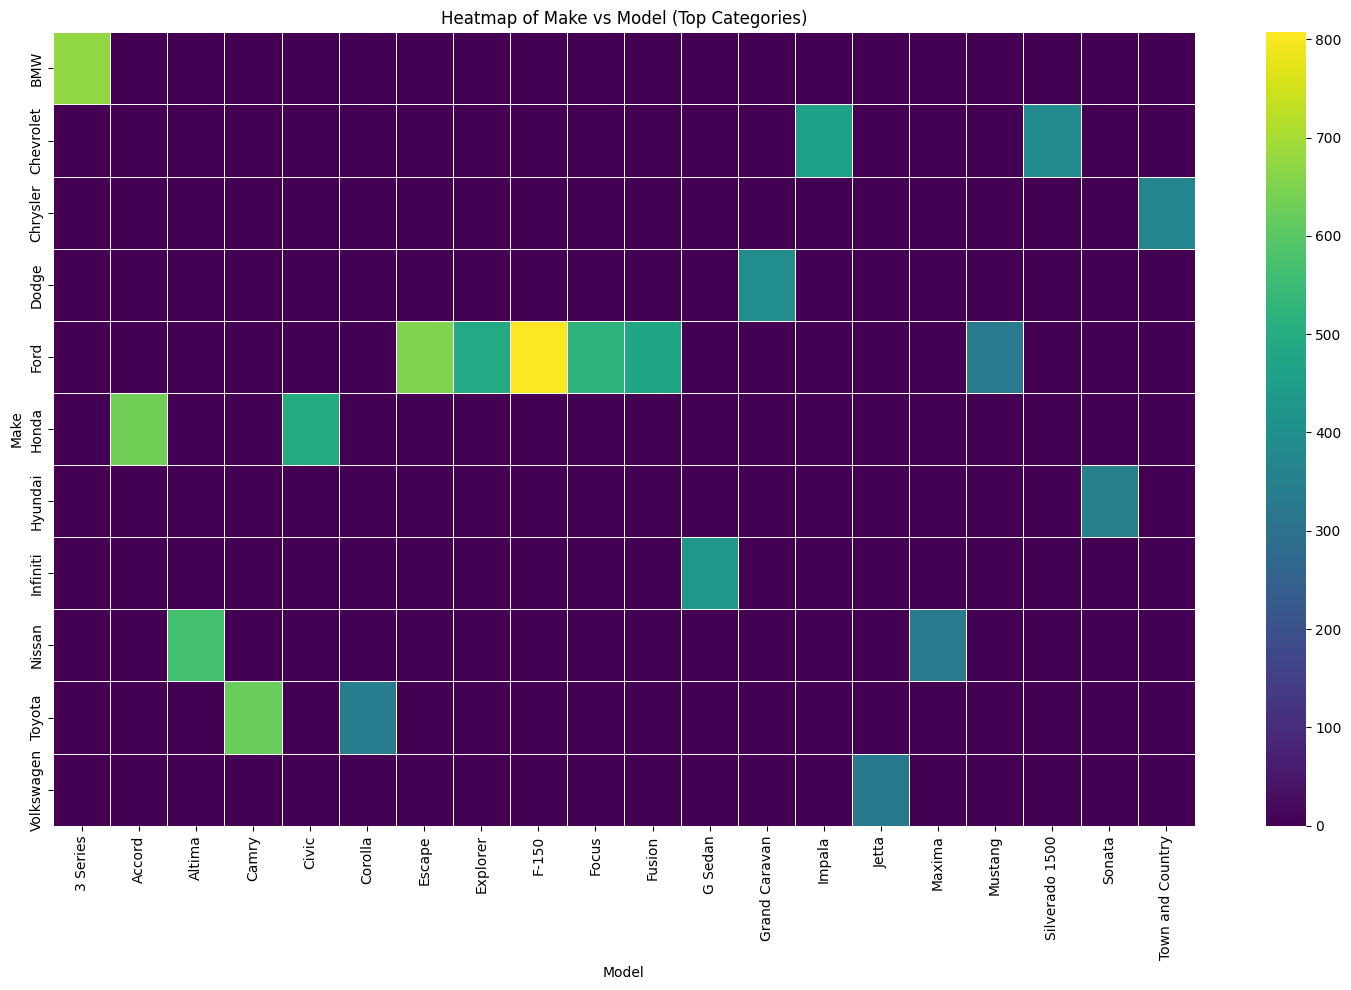

In [87]:
if not df_top_categories.empty:
    make_model_counts = pd.crosstab(df_top_categories['make'], df_top_categories['model'])

    # Only plot if the matrix is not too large
    if make_model_counts.shape[0] * make_model_counts.shape[1] < 1000: # Heuristic limit
        plt.figure(figsize=(15, 10))
        sns.heatmap(make_model_counts, cmap='viridis', annot=False, fmt='d', linewidths=.5)
        plt.title('Heatmap of Make vs Model (Top Categories)')
        plt.xlabel('Model')
        plt.ylabel('Make')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Make vs Model contingency table is too large ({make_model_counts.shape}), skipping heatmap.")
        print("Consider reducing 'top_n' or exploring specific subsets.")

else:
     print("Not enough data points after filtering for top categories to create Make vs Model heatmap.")


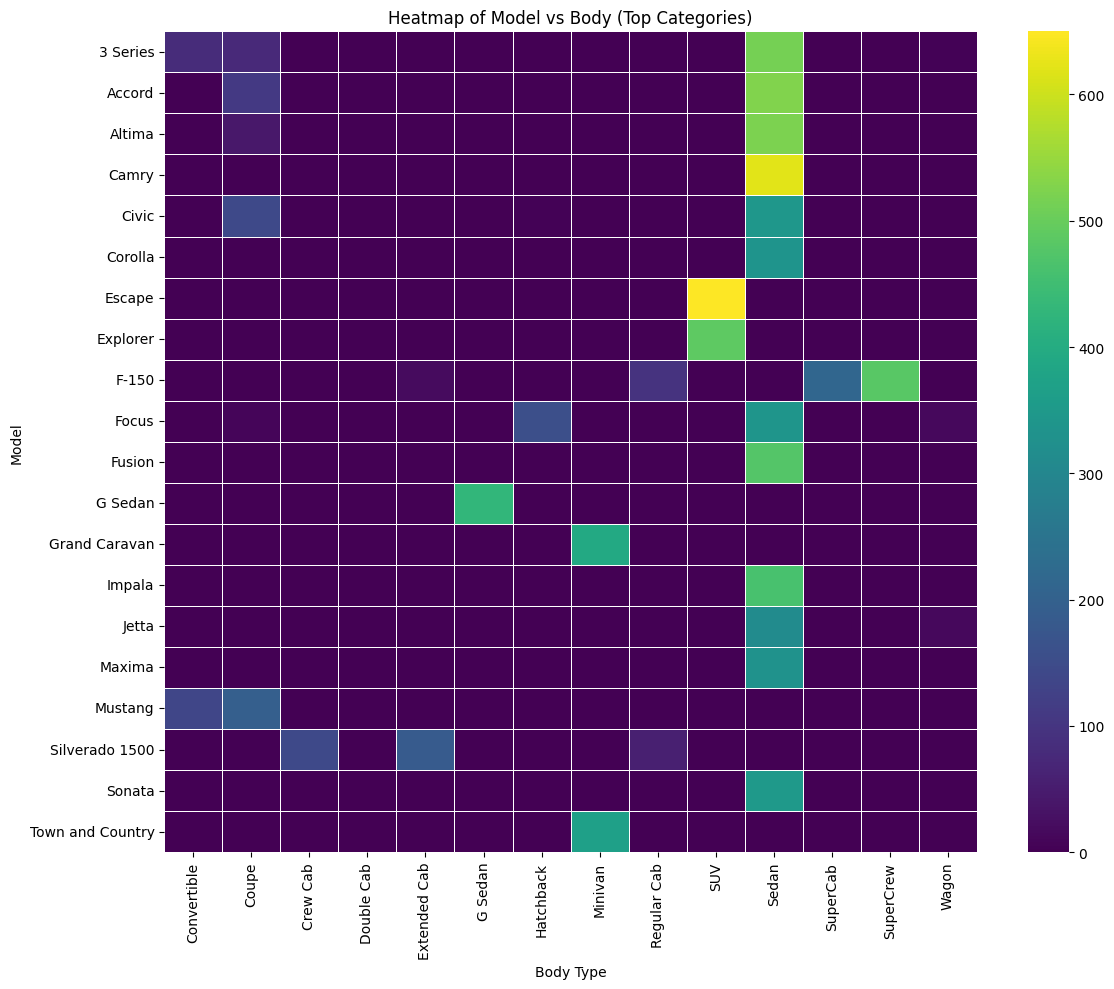

In [88]:
# Heatmap: Model vs Body (might still be large depending on top_n)
if not df_top_categories.empty:
    model_body_counts = pd.crosstab(df_top_categories['model'], df_top_categories['body'])

    # Only plot if the matrix is not too large
    if model_body_counts.shape[0] * model_body_counts.shape[1] < 1000: # Heuristic limit
         plt.figure(figsize=(12, 10))
         sns.heatmap(model_body_counts, cmap='viridis', annot=False, fmt='d', linewidths=.5)
         plt.title('Heatmap of Model vs Body (Top Categories)')
         plt.xlabel('Body Type')
         plt.ylabel('Model')
         plt.tight_layout()
         plt.show()
    else:
        print(f"Model vs Body contingency table is too large ({model_body_counts.shape}), skipping heatmap.")
        print("Consider reducing 'top_n' or exploring specific subsets.")
else:
    print("Not enough data points after filtering for top categories to create Model vs Body heatmap.")


In [94]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['make'], df['body'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared: {chi2}, P-value: {p}")

Chi-squared: 94319.47798218907, P-value: 0.0


# **Random Forest**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
features = ['vin', 'state', 'odometer', 'seller', 'mmr']
target = 'sellingprice'

# Step 1: Filter valid rows and handle missing values
df = df[features + [target]].dropna()

In [6]:
# Step 2: Create binary target: 'High' if above median, else 'Low'
median_price = df['sellingprice'].median()
df['price_category'] = df['sellingprice'].apply(lambda x: 'High' if x >= median_price else 'Low')

In [13]:
# Step 3: Encode categorical features
# Simplify 'vin' using frequency encoding (number of times each VIN appears)
df['vin_freq'] = df['vin'].map(df['vin'].value_counts())

# Select only needed columns now
df_model = df[['vin_freq', 'odometer', 'mmr', 'price_category']]



In [14]:
X = df_model.drop('price_category', axis=1)
y = df_model['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.93      0.93     56646
         Low       0.93      0.92      0.93     55095

    accuracy                           0.93    111741
   macro avg       0.93      0.93      0.93    111741
weighted avg       0.93      0.93      0.93    111741

Accuracy: 0.927036629348225


# **Linear Regression**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Coerce odometer and sellingprice to numeric (handle 'x' or other strings)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')

# Drop rows where sellingprice is missing (target variable must be present)
df.dropna(subset=['sellingprice'], inplace=True)

# Impute missing odometer values using KNN
imputer = KNNImputer(n_neighbors=5)
df[['odometer']] = imputer.fit_transform(df[['odometer']])

# Fill other missing categorical values (example defaults)
fill_defaults = {
    'condition': 'good',
    'color': 'black',
    'body': 'sedan',
    'transmission': 'automatic',
    'make': 'toyota',
    'model': 'camry',
    'trim': 'base',
    'interior': 'standard'
}
df.fillna(value=fill_defaults, inplace=True)

In [3]:

# One-hot encode categorical variables
categorical_cols = ['make', 'model', 'body']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']

In [4]:
# Ensure all X values are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.dropna(axis=1, inplace=True)  # Drop columns with non-numeric data
X.dropna(axis=0, inplace=True)  # Drop rows with any missing values
y = y.loc[X.index]  # Align target

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
# Evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 18034939.887584444
R-squared Score: 0.8109893797337697
